# Regressão Logística I
## Tarefa I

Neste exercício vamos trabalhar com a base "Heart Disease Data Set" disponível no site do [UCI](https://archive.ics.uci.edu/ml/datasets/heart+disease).

Temos 303 indivíduos e vamos utilizar 13 variáveis disponíveis para prever a presença de doença cardíaca na variável ```num```(a 14$^a$ variável).

A descrição das variáveis está recortada abaixo:
- age: idade do paciente em anos
- sex: sexo (1 = male; 0 = female)  
- cp: tipo de dor no peito
  - 1: angina típica
  - 2: angina atípica
  - 3: dor não-angina
  - 4: assintomático
- trestbps: pressão sanguínea em repouso (em mm Hg na admissão ao hospital
- chol: colesterol sérico em mg/dl
- fbs: (açúcar no sangue em jejum > 120 mg/dl) (1 = True; 0 = False)
- restecg: resultados eletrocardiográficos em repouso
  - 0: normal
  - 1: tendo anormalidade da onda ST-T (Inversões de onda T e / ou ST com elevação ou depressão de > 0.05 mV)
  - 2: mostrando hipertrofia ventricular esquerda provável ou definitiva pelos critérios de Estes
- thalach: frequência cardíaca máxima alcançada
- exang: angina induzida por exercício(1 = sim; 0 = não)
- oldpeak = Depressão de ST induzida por exercício em relação ao repouso
- slope: Depressão de ST induzida por exercício em relação ao repouso
  - 1: inclinação ascendente
  - 2: estável
  - 3: inclinação descendente
- ca: número de vasos principais (0-3) coloridos por fluorosopia
- thal: 3 = normal; 6 = defeito corrigido; 7 = defeito reversível
- num: diagnóstico de doença cardíaga (status de doença angiográfica)

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

import statsmodels.formula.api as smf

In [2]:
url = 'https://archive.ics.uci.edu/ml/machine-learning-databases/heart-disease/processed.cleveland.data'

df = pd.read_csv(url, 
                 names=['age', 'sex', 'cp', 'trestbps', 'chol', 'fbs', 'restecg',
                        'thalach', 'exang', 'oldpeak', 'slope', 'ca', 'thal', 'num'])
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,num
0,63.0,1.0,1.0,145.0,233.0,1.0,2.0,150.0,0.0,2.3,3.0,0.0,6.0,0
1,67.0,1.0,4.0,160.0,286.0,0.0,2.0,108.0,1.0,1.5,2.0,3.0,3.0,2
2,67.0,1.0,4.0,120.0,229.0,0.0,2.0,129.0,1.0,2.6,2.0,2.0,7.0,1
3,37.0,1.0,3.0,130.0,250.0,0.0,0.0,187.0,0.0,3.5,3.0,0.0,3.0,0
4,41.0,0.0,2.0,130.0,204.0,0.0,2.0,172.0,0.0,1.4,1.0,0.0,3.0,0


In [4]:
df['flag_doente'] = (df['num'] != 0).astype('int64')
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,num,flag_doente
0,63.0,1.0,1.0,145.0,233.0,1.0,2.0,150.0,0.0,2.3,3.0,0.0,6.0,0,0
1,67.0,1.0,4.0,160.0,286.0,0.0,2.0,108.0,1.0,1.5,2.0,3.0,3.0,2,1
2,67.0,1.0,4.0,120.0,229.0,0.0,2.0,129.0,1.0,2.6,2.0,2.0,7.0,1,1
3,37.0,1.0,3.0,130.0,250.0,0.0,0.0,187.0,0.0,3.5,3.0,0.0,3.0,0,0
4,41.0,0.0,2.0,130.0,204.0,0.0,2.0,172.0,0.0,1.4,1.0,0.0,3.0,0,0


In [5]:
df.to_csv('Regressão_Logística_I_ex_1')

1. Monte uma bivariada para a variável ```sex``` com as seguintes estatísticas:

- Número de *saudáveis*
- Número de *doentes*
- Total
- Quantidade média de doentes
- *Odds*
- *Odds ratio* (Use o total como referência)
- Logito (LOG(*Odds*))
- O LOG do *Odds ratio* (com o total como referência) é chamado de *Weight of Evidence* (WOE). Calcule-o.

In [10]:
#Número de saudáveis:
distribuicao_saudaveis_por_sexo = df[df['num'] == 0].groupby('sex').size()

distribuicao_saudaveis_por_sexo

sex
0.0    72
1.0    92
dtype: int64

In [12]:
#Número de doentes
distribuicao_doentes_por_sexo = df[df['num'] != 0].groupby('sex').size()

distribuicao_doentes_por_sexo

sex
0.0     25
1.0    114
dtype: int64

In [14]:
# Total
total_por_sexo = df.groupby('sex').size()

total_por_sexo

sex
0.0     97
1.0    206
dtype: int64

In [16]:
#Quantidade média de doentes
media_doentes_por_sexo = df.groupby('sex')['num'].mean()

media_doentes_por_sexo

sex
0.0    0.536082
1.0    1.126214
Name: num, dtype: float64

In [21]:
#Odds
odds_por_sexo = distribuicao_doentes_por_sexo / distribuicao_saudaveis_por_sexo

odds_por_sexo

sex
0.0    0.347222
1.0    1.239130
dtype: float64

In [23]:
# Calculando o Odds Ratio usando o total como referência
total_doentes = df['num'] != 0
total_saudaveis = df['num'] == 0

odds_total = total_doentes.sum() / total_saudaveis.sum()
odds_total

0.8475609756097561

In [25]:
# Calculando Odds Ratio individual de cada sexo contra o total
odds_ratio_feminino_vs_total = (distribuicao_doentes_por_sexo[0.0] / distribuicao_saudaveis_por_sexo[0.0]) / odds_total

odds_ratio_feminino_vs_total

0.40967226219024777

In [27]:
odds_ratio_masculino_vs_total = (distribuicao_doentes_por_sexo[1.0] / distribuicao_saudaveis_por_sexo[1.0]) / odds_total

odds_ratio_masculino_vs_total

1.4619956208945886

In [29]:
# Logito (LOG(Odds))
logito_por_sexo = np.log(odds_por_sexo)

logito_por_sexo

sex
0.0   -1.05779
1.0    0.21441
dtype: float64

In [31]:
#Weight of Evidence (WOE) para cada sexo usando o total como referência
woe_feminino = np.log(odds_ratio_feminino_vs_total)

woe_feminino

-0.8923977994543479

In [33]:
woe_masculino = np.log(odds_ratio_masculino_vs_total)

woe_masculino

0.3798023660389617

2. Monte uma bivariada para a variável ```age``` com as seguintes estatísticas:
- Categorize a variável em 5 grupos
- Calcule as mesmas quantidades calculadas no execício anterior
- Calcule também o valor médio da variável ```age```

In [39]:
# Definindo os grupos de idade
bins = [0, 30, 40, 50, 60, 70, 80]
labels = ['<30', '30-39', '40-49', '50-59', '60-69', '70+']

# Criando uma nova coluna para faixa etária
df['faixa_etaria'] = pd.cut(df['age'], bins=bins, labels=labels, right=False)
df

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,num,flag_doente,categoria_idade,faixa_etaria
0,63.0,1.0,1.0,145.0,233.0,1.0,2.0,150.0,0.0,2.3,3.0,0.0,6.0,0,0,>60,60-69
1,67.0,1.0,4.0,160.0,286.0,0.0,2.0,108.0,1.0,1.5,2.0,3.0,3.0,2,1,>60,60-69
2,67.0,1.0,4.0,120.0,229.0,0.0,2.0,129.0,1.0,2.6,2.0,2.0,7.0,1,1,>60,60-69
3,37.0,1.0,3.0,130.0,250.0,0.0,0.0,187.0,0.0,3.5,3.0,0.0,3.0,0,0,30-40,30-39
4,41.0,0.0,2.0,130.0,204.0,0.0,2.0,172.0,0.0,1.4,1.0,0.0,3.0,0,0,40-50,40-49
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,45.0,1.0,1.0,110.0,264.0,0.0,0.0,132.0,0.0,1.2,2.0,0.0,7.0,1,1,40-50,40-49
299,68.0,1.0,4.0,144.0,193.0,1.0,0.0,141.0,0.0,3.4,2.0,2.0,7.0,2,1,>60,60-69
300,57.0,1.0,4.0,130.0,131.0,0.0,0.0,115.0,1.0,1.2,2.0,1.0,7.0,3,1,50-60,50-59
301,57.0,0.0,2.0,130.0,236.0,0.0,2.0,174.0,0.0,0.0,2.0,1.0,3.0,1,1,50-60,50-59


In [43]:
# Calculando o número de pacientes saudáveis por faixa etária
audaveis_por_idade = df[df['flag_doente'] == 0].groupby('faixa_etaria')['flag_doente'].count()

saudaveis_por_idade

C:\Users\Matheus Cerqueira\AppData\Local\Temp\ipykernel_5196\3912191181.py:2: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  audaveis_por_idade = df[df['flag_doente'] == 0].groupby('faixa_etaria')['flag_doente'].count()


faixa_etaria
<30       1
30-39    10
40-49    50
50-59    65
60-69    32
70+       6
Name: flag_doente, dtype: int64

In [45]:
# Calculando o número de pacientes doentes por faixa etária
doentes_por_idade = df[df['flag_doente'] == 1].groupby('faixa_etaria')['flag_doente'].count()

doentes_por_idade

C:\Users\Matheus Cerqueira\AppData\Local\Temp\ipykernel_5196\848052031.py:2: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  doentes_por_idade = df[df['flag_doente'] == 1].groupby('faixa_etaria')['flag_doente'].count()


faixa_etaria
<30       0
30-39     4
40-49    22
50-59    60
60-69    49
70+       4
Name: flag_doente, dtype: int64

In [47]:
# Calculando o número total de pacientes por faixa etária
total_por_idade = df.groupby('faixa_etaria')['faixa_etaria'].count()

total_por_idade

C:\Users\Matheus Cerqueira\AppData\Local\Temp\ipykernel_5196\327869055.py:2: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  total_por_idade = df.groupby('faixa_etaria')['faixa_etaria'].count()


faixa_etaria
<30        1
30-39     14
40-49     72
50-59    125
60-69     81
70+       10
Name: faixa_etaria, dtype: int64

In [48]:
# Calculando a quantidade média de doentes por faixa etária
media_doentes_por_idade = doentes_por_idade / total_por_idade

media_doentes_por_idade

faixa_etaria
<30      0.000000
30-39    0.285714
40-49    0.305556
50-59    0.480000
60-69    0.604938
70+      0.400000
dtype: float64

In [49]:
# Calculando as odds de doença por faixa etária
odds_doentes_por_idade = doentes_por_idade / (total_por_idade - doentes_por_idade)

odds_doentes_por_idade

faixa_etaria
<30      0.000000
30-39    0.400000
40-49    0.440000
50-59    0.923077
60-69    1.531250
70+      0.666667
dtype: float64

In [51]:
# Calculando as odds totais de doença no dataset
total_doentes = df['flag_doente'].sum()
total_saudaveis = len(df) - total_doentes
odds_total = total_doentes / total_saudaveis

# Calculando o Odds Ratio para cada faixa etária em relação ao total
odds_ratio_por_idade = odds_doentes_por_idade / odds_total

odds_ratio_por_idade

faixa_etaria
<30      0.000000
30-39    0.471942
40-49    0.519137
50-59    1.089098
60-69    1.806655
70+      0.786571
dtype: float64

In [56]:
# Calculando o logito para cada faixa etária
logito_por_idade = np.log(odds_doentes_por_idade.replace(0, np.nan))  # Substituir zeros por NaN para evitar erro no log de 0

logito_por_idade

faixa_etaria
<30           NaN
30-39   -0.916291
40-49   -0.820981
50-59   -0.080043
60-69    0.426084
70+     -0.405465
dtype: float64

In [53]:
# Calculando o Weight of Evidence (WOE) para cada faixa etária
woe_por_idade = np.log(odds_ratio_por_idade.replace(0, np.nan))  # Substituir zeros por NaN para evitar erro no log de 0

woe_por_idade

faixa_etaria
<30           NaN
30-39   -0.750898
40-49   -0.655588
50-59    0.085350
60-69    0.591477
70+     -0.240073
dtype: float64

3. Visualize a informação da bivariada construída acima através de um gráfico da sua escolha.

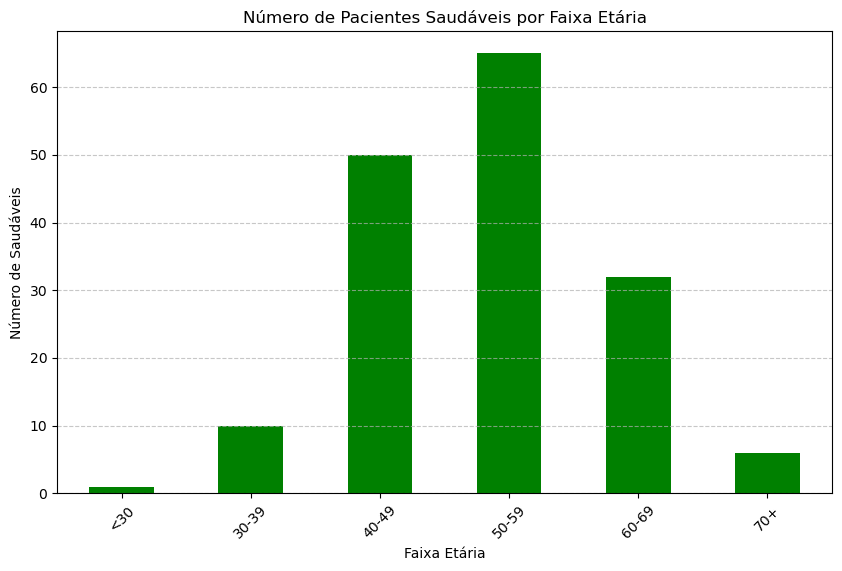

In [55]:
# Criando um gráfico de barras para os saudáveis por faixa etária
plt.figure(figsize=(10, 6))
saudaveis_por_idade.plot(kind='bar', color='green')
plt.title('Número de Pacientes Saudáveis por Faixa Etária')
plt.xlabel('Faixa Etária')
plt.ylabel('Número de Saudáveis')
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

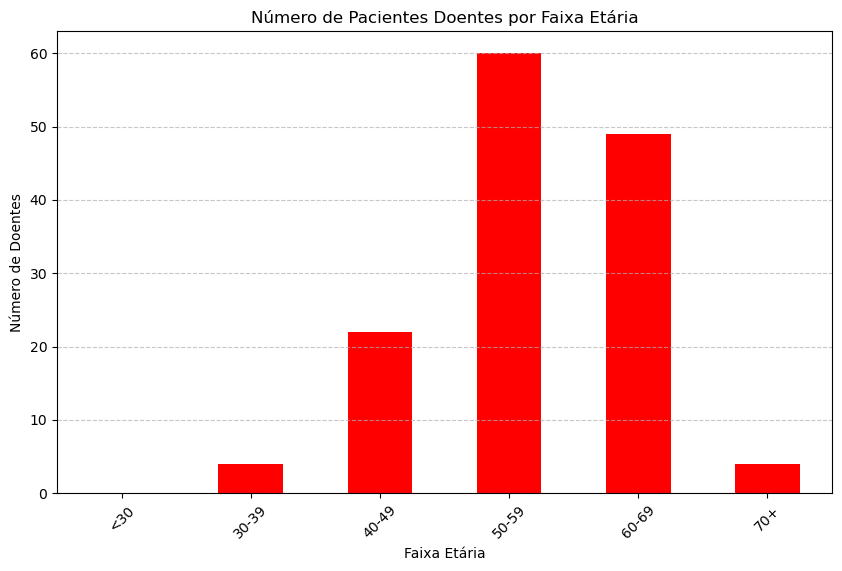

In [57]:
# Criando um gráfico de barras para os doentes por faixa etária
plt.figure(figsize=(10, 6))
doentes_por_idade.plot(kind='bar', color='red')
plt.title('Número de Pacientes Doentes por Faixa Etária')
plt.xlabel('Faixa Etária')
plt.ylabel('Número de Doentes')
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

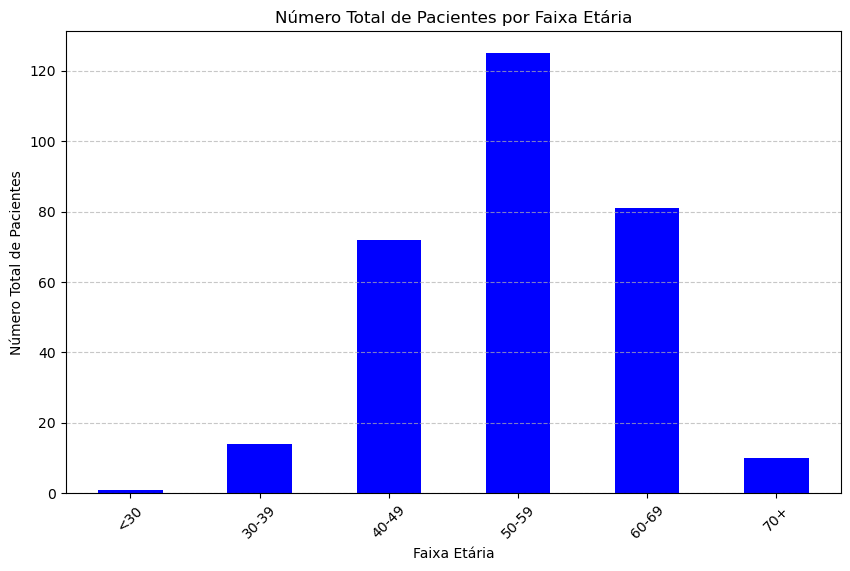

In [58]:
# Criando um gráfico de barras para o total de pacientes por faixa etária
plt.figure(figsize=(10, 6))
total_por_idade.plot(kind='bar', color='blue')
plt.title('Número Total de Pacientes por Faixa Etária')
plt.xlabel('Faixa Etária')
plt.ylabel('Número Total de Pacientes')
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

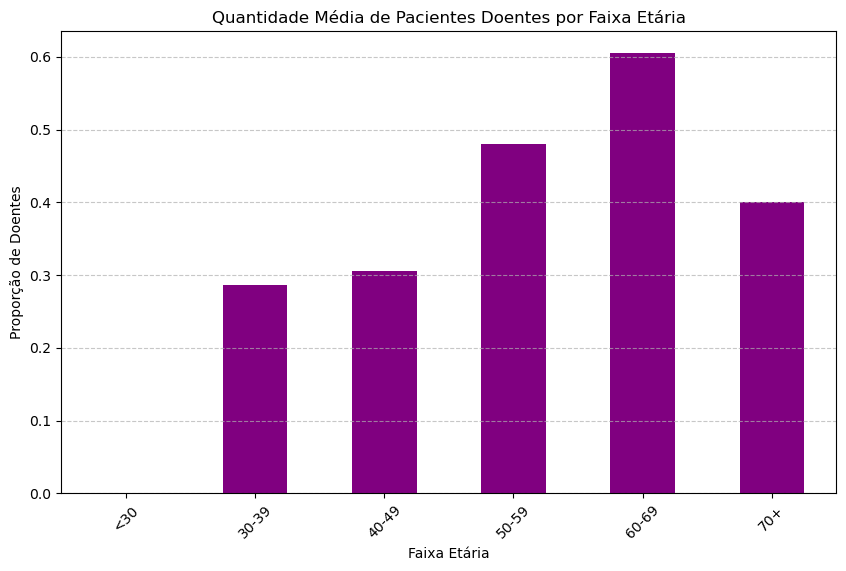

In [59]:
# Criando um gráfico de barras para a quantidade média de doentes por faixa etária
plt.figure(figsize=(10, 6))
media_doentes_por_idade.plot(kind='bar', color='purple')
plt.title('Quantidade Média de Pacientes Doentes por Faixa Etária')
plt.xlabel('Faixa Etária')
plt.ylabel('Proporção de Doentes')
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

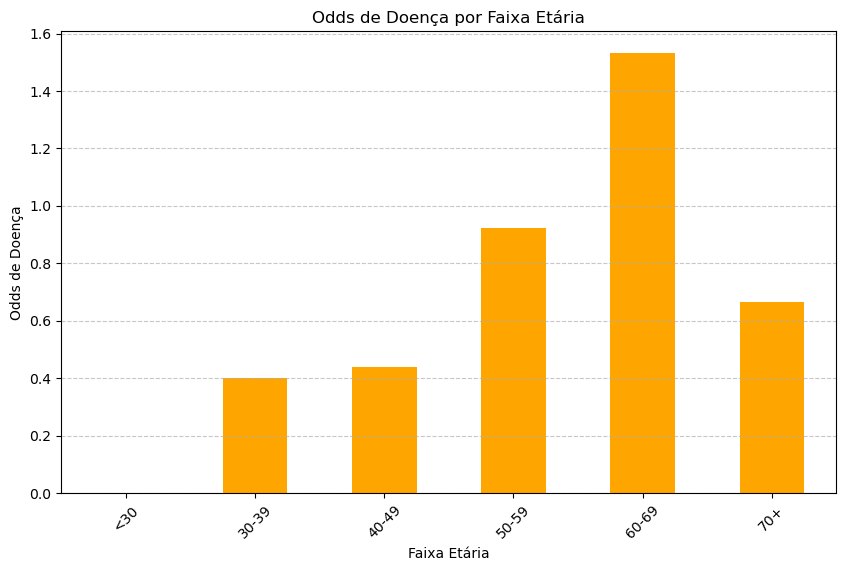

In [60]:
# Criando um gráfico de barras para as odds de doença por faixa etária
plt.figure(figsize=(10, 6))
odds_doentes_por_idade.plot(kind='bar', color='orange')
plt.title('Odds de Doença por Faixa Etária')
plt.xlabel('Faixa Etária')
plt.ylabel('Odds de Doença')
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

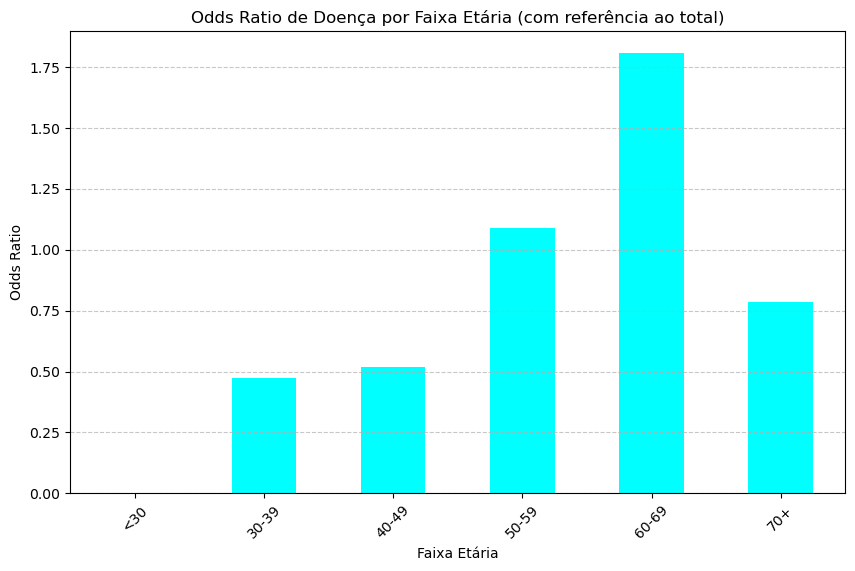

In [61]:
# Criando um gráfico de barras para o Odds Ratio de doença por faixa etária
plt.figure(figsize=(10, 6))
odds_ratio_por_idade.plot(kind='bar', color='cyan')
plt.title('Odds Ratio de Doença por Faixa Etária (com referência ao total)')
plt.xlabel('Faixa Etária')
plt.ylabel('Odds Ratio')
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

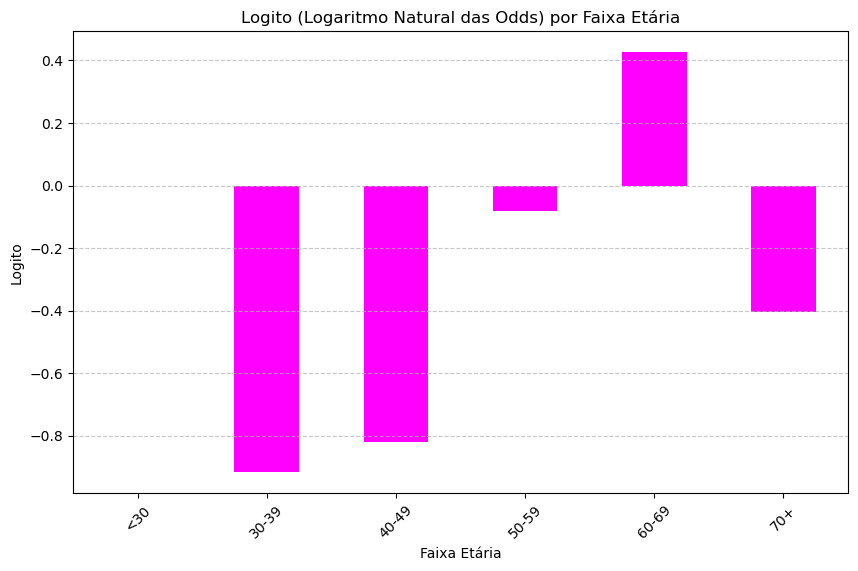

In [62]:
# Criando um gráfico de barras para o logito por faixa etária
plt.figure(figsize=(10, 6))
logito_por_idade.plot(kind='bar', color='magenta')
plt.title('Logito (Logaritmo Natural das Odds) por Faixa Etária')
plt.xlabel('Faixa Etária')
plt.ylabel('Logito')
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

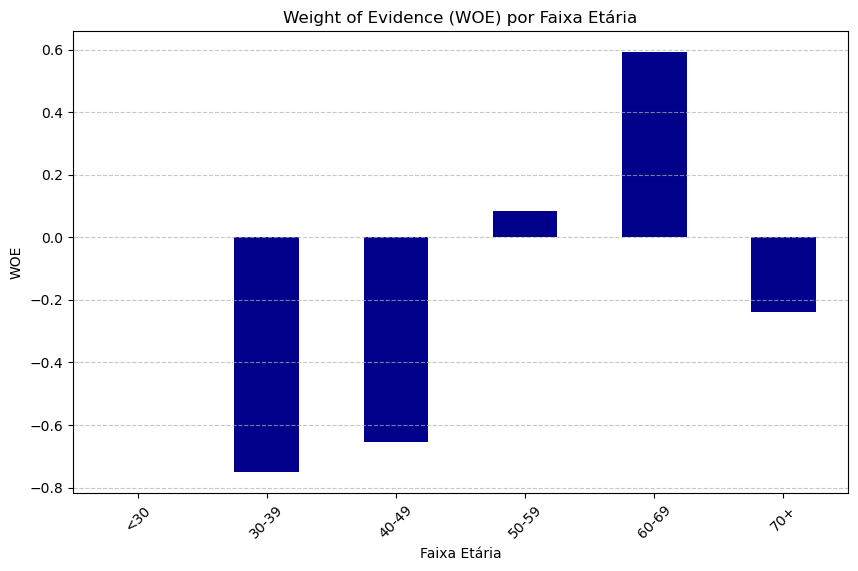

In [63]:
# Criando um gráfico de barras para o Weight of Evidence (WOE) por faixa etária
plt.figure(figsize=(10, 6))
woe_por_idade.plot(kind='bar', color='darkblue')
plt.title('Weight of Evidence (WOE) por Faixa Etária')
plt.xlabel('Faixa Etária')
plt.ylabel('WOE')
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()